In [1]:
suppressPackageStartupMessages({
library(tidyverse)
})
options(repr.plot.width=9, repr.plot.height=9)

# Dragon Curve

In [2]:
f2 <- function(x=0, y=0, theta=0, n=10) {
	dragon = "FX"
	for(i in 0:n) {
		dragon = gsub("X","x+yF+", dragon)
		dragon = gsub("Y","-Fx-y", dragon)
		dragon = gsub("x","X", dragon)
		dragon = gsub("y","Y", dragon)
	}
	d = data.frame()
	for(i in strsplit(dragon,"")[[1]]) {
		if(i == "F") {
			x2 = x + cos(theta)
			y2 = y + sin(theta)
			d = rbind(d, data.frame(x=x, y=y, xend=x2, yend=y2))
			x = x2
			y = y2
		}
		else if(i == "+") { theta = theta + pi/2 }
		else if(i == "-") { theta = theta - pi/2 }
	}
	return(d)
}

In [3]:
a = f2(theta=0, n=10)
b = f2(theta=pi/2, n=11)
c = f2(theta=pi, n=12)
d = f2(theta=3*pi/2, n=13)

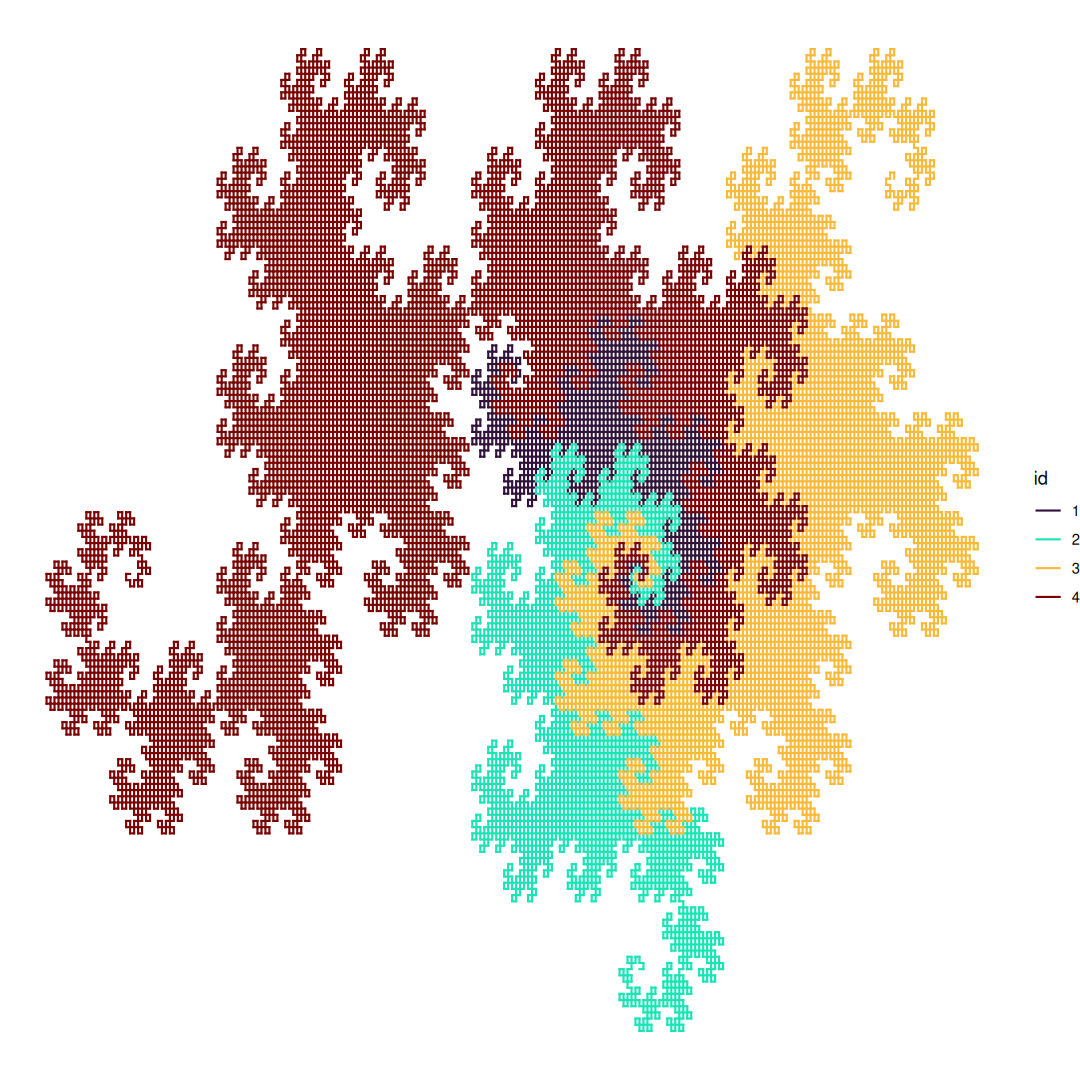

In [4]:
bind_rows(a,b,c,d, .id='id') |>
ggplot(aes(x=x, y=y, xend=xend, yend=yend, color=id)) +
geom_segment(linewidth=.6, lineend='square') +
scale_color_viridis_d(option='turbo') +
theme_void()